In [1]:
# Importing the Keras libraries and packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
image_shape=(224,224,3)


2022-03-01 15:40:16.652008: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
#Load the pretrained Network
#vgg16_model = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height,img_width,3), pooling=None, classes=1000)

vgg16_model=tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                             weights='imagenet')
print("pretrained Network is loaded")

2022-03-01 15:40:24.983178: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-01 15:40:24.984685: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-01 15:40:25.102683: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-03-01 15:40:25.102759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-01 15:40:25.106951: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-01 15:40:25.107081: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

pretrained Network is loaded


In [5]:
# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False
print("Pretrained layers are freezed")

Pretrained layers are freezed


In [6]:
from tensorflow.keras.models import Sequential
model=Sequential()
print("Model is intianiated")

Model is intianiated


In [7]:
model.add(vgg16_model)
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(4096, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
hidden_layer=model.add(Dense(128, activation='relu', name='hidden_layer'))
classification_layer=model.add(Dense(64, activation='relu', name='classification_layer'))
output_layer=model.add(Dense(1, activation='sigmoid', name='output_layer')) 
print("All layers top of pretrained layers are developed")

All layers top of pretrained layers are developed


https://www.kaggle.com/blurredmachine/alexnet-architecture-a-complete-guide

In [8]:
# Input parameter
#train_data_dir ='/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir'
train_data_dir='/home/poornima/Data/GDPS/train_dir/'
val_data_dir ='/home/poornima/Data/GDPS/val_dir/'
model_weights_file = '/home/poornima/Data/GDPS/model_vgg16_weights.hdf5'
nb_epochs = 300
print("Input parameters are assigned")

Input parameters are assigned


In [9]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [10]:
# image data generation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=16,shuffle=False,class_mode='binary')

Found 172800 images belonging to 2 classes.
Found 43200 images belonging to 2 classes.


In [11]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
filepath = "/home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=100, verbose=1, mode='auto')

In [12]:
#callbacks = [ModelCheckpoint(model_weights_file, monitor='val_acc', save_best_only=True)]

history = model.fit(train_generator, epochs=nb_epochs, validation_data=validation_generator, callbacks=[checkpoint,early])

print('Training Completed!')

2022-03-01 15:42:58.034604: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-01 15:42:58.036788: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/300


2022-03-01 15:42:58.591269: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-01 15:42:58.814029: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-03-01 15:42:59.909936: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-03-01 15:43:00.002792: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


10800/10800 [==============================] - 2067s 190ms/step - loss: 0.6892 - accuracy: 0.5621 - val_loss: 0.6572 - val_accuracy: 0.5859

Epoch 00001: val_accuracy improved from -inf to 0.58588, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-01-0.59.h5
Epoch 2/300
10800/10800 [==============================] - 2045s 189ms/step - loss: 0.6603 - accuracy: 0.5974 - val_loss: 0.6388 - val_accuracy: 0.6276

Epoch 00002: val_accuracy improved from 0.58588 to 0.62759, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-02-0.63.h5
Epoch 3/300
10800/10800 [==============================] - 2054s 190ms/step - loss: 0.6500 - accuracy: 0.6195 - val_loss: 0.6357 - val_accuracy: 0.6322

Epoch 00003: val_accuracy improved from 0.62759 to 0.63218, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-03-0.63.h5
Epoch 4/300
10800/10800 [==============================] - 2063s 191ms/step - loss: 0.6479 - accuracy: 0.6188 - val_loss: 0.6308 - val_a

10800/10800 [==============================] - 2045s 189ms/step - loss: 0.6052 - accuracy: 0.6640 - val_loss: 0.6063 - val_accuracy: 0.6602

Epoch 00035: val_accuracy did not improve from 0.66116
Epoch 36/300
10800/10800 [==============================] - 2045s 189ms/step - loss: 0.6055 - accuracy: 0.6648 - val_loss: 0.6000 - val_accuracy: 0.6643

Epoch 00036: val_accuracy improved from 0.66116 to 0.66433, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-36-0.66.h5
Epoch 37/300
10800/10800 [==============================] - 2047s 190ms/step - loss: 0.6026 - accuracy: 0.6622 - val_loss: 0.6040 - val_accuracy: 0.6594

Epoch 00037: val_accuracy did not improve from 0.66433
Epoch 38/300
10800/10800 [==============================] - 2048s 190ms/step - loss: 0.6069 - accuracy: 0.6588 - val_loss: 0.6303 - val_accuracy: 0.6456

Epoch 00038: val_accuracy did not improve from 0.66433
Epoch 39/300
10800/10800 [==============================] - 2043s 189ms/step - loss: 0.6040 

10800/10800 [==============================] - 2042s 189ms/step - loss: 0.5692 - accuracy: 0.6953 - val_loss: 0.6206 - val_accuracy: 0.6517

Epoch 00071: val_accuracy did not improve from 0.67171
Epoch 72/300
10800/10800 [==============================] - 2042s 189ms/step - loss: 0.5614 - accuracy: 0.7009 - val_loss: 0.6063 - val_accuracy: 0.6564

Epoch 00072: val_accuracy did not improve from 0.67171
Epoch 73/300
10800/10800 [==============================] - 2046s 189ms/step - loss: 0.5645 - accuracy: 0.6960 - val_loss: 0.5970 - val_accuracy: 0.6721

Epoch 00073: val_accuracy improved from 0.67171 to 0.67213, saving model to /home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-73-0.67.h5
Epoch 74/300
10800/10800 [==============================] - 2049s 190ms/step - loss: 0.5648 - accuracy: 0.6996 - val_loss: 0.6333 - val_accuracy: 0.6598

Epoch 00074: val_accuracy did not improve from 0.67213
Epoch 75/300
10800/10800 [==============================] - 2050s 190ms/step - loss: 0.5610 

10800/10800 [==============================] - 2044s 189ms/step - loss: 0.4967 - accuracy: 0.7496 - val_loss: 0.6851 - val_accuracy: 0.6543

Epoch 00108: val_accuracy did not improve from 0.67544
Epoch 109/300
10800/10800 [==============================] - 2053s 190ms/step - loss: 0.4943 - accuracy: 0.7495 - val_loss: 0.6405 - val_accuracy: 0.6581

Epoch 00109: val_accuracy did not improve from 0.67544
Epoch 110/300
10800/10800 [==============================] - 2056s 190ms/step - loss: 0.4953 - accuracy: 0.7485 - val_loss: 0.6559 - val_accuracy: 0.6575

Epoch 00110: val_accuracy did not improve from 0.67544
Epoch 111/300
10800/10800 [==============================] - 2053s 190ms/step - loss: 0.4900 - accuracy: 0.7536 - val_loss: 0.6926 - val_accuracy: 0.6484

Epoch 00111: val_accuracy did not improve from 0.67544
Epoch 112/300
10800/10800 [==============================] - 2050s 190ms/step - loss: 0.4830 - accuracy: 0.7588 - val_loss: 0.6290 - val_accuracy: 0.6684

Epoch 00112: val_ac

10800/10800 [==============================] - 2043s 189ms/step - loss: 0.3123 - accuracy: 0.8565 - val_loss: 0.8922 - val_accuracy: 0.6467

Epoch 00147: val_accuracy did not improve from 0.67544
Epoch 148/300
10800/10800 [==============================] - 2050s 190ms/step - loss: 0.3040 - accuracy: 0.8625 - val_loss: 0.8843 - val_accuracy: 0.6365

Epoch 00148: val_accuracy did not improve from 0.67544
Epoch 149/300
10800/10800 [==============================] - 2053s 190ms/step - loss: 0.3031 - accuracy: 0.8616 - val_loss: 0.9126 - val_accuracy: 0.6441

Epoch 00149: val_accuracy did not improve from 0.67544
Epoch 150/300
10800/10800 [==============================] - 2054s 190ms/step - loss: 0.3001 - accuracy: 0.8630 - val_loss: 0.9268 - val_accuracy: 0.6463

Epoch 00150: val_accuracy did not improve from 0.67544
Epoch 151/300
10800/10800 [==============================] - 2050s 190ms/step - loss: 0.2928 - accuracy: 0.8683 - val_loss: 1.0416 - val_accuracy: 0.6309

Epoch 00151: val_ac

10800/10800 [==============================] - 2045s 189ms/step - loss: 0.1394 - accuracy: 0.9407 - val_loss: 1.4032 - val_accuracy: 0.6343

Epoch 00186: val_accuracy did not improve from 0.67544
Epoch 187/300
10800/10800 [==============================] - 2049s 190ms/step - loss: 0.1379 - accuracy: 0.9417 - val_loss: 1.5615 - val_accuracy: 0.6338

Epoch 00187: val_accuracy did not improve from 0.67544
Epoch 188/300
10800/10800 [==============================] - 2041s 189ms/step - loss: 0.1320 - accuracy: 0.9444 - val_loss: 1.7032 - val_accuracy: 0.6282

Epoch 00188: val_accuracy did not improve from 0.67544
Epoch 189/300
10800/10800 [==============================] - 2054s 190ms/step - loss: 0.1310 - accuracy: 0.9445 - val_loss: 1.7651 - val_accuracy: 0.6165

Epoch 00189: val_accuracy did not improve from 0.67544
Epoch 190/300
10800/10800 [==============================] - 2052s 190ms/step - loss: 0.1302 - accuracy: 0.9448 - val_loss: 1.6036 - val_accuracy: 0.6320

Epoch 00190: val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


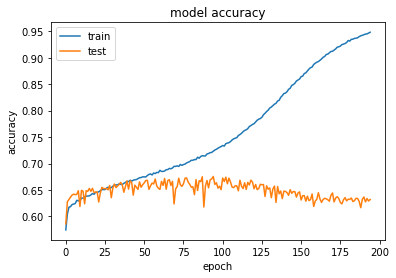

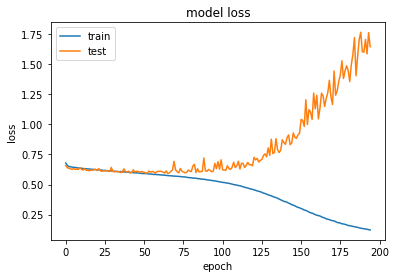

In [13]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
 # save model and architecture to single file
model.save('/home/poornima/Data/GDPS/VGG16/novel_model_verification_GDPS_sgd.h5')
model.summary()

print("Saved model to disk")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128    
_________________________________________________________________
classification_layer (Dense) (None, 64)               

In [15]:
# save weights to single file
model.save_weights('/home/poornima/Data/GDPS/VGG16/novel_model_verification_weights_GDPS_SGD.h5')
print("Weights saved in local  Drive")

Weights saved in local  Drive


In [16]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/home/poornima/Data/GDPS/VGG16/novel_model_verification_GDPS_sgd.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128    
_________________________________________________________________
classification_layer (Dense) (None, 64

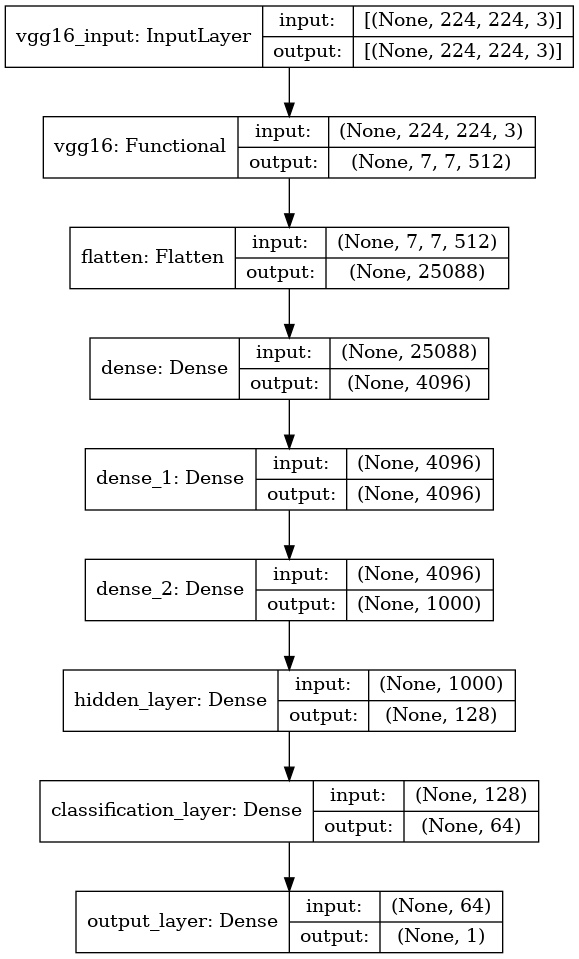

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='VGG model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [18]:
import pandas as pd
validation_generator.reset
ytesthat = model.predict(validation_generator)
print(ytesthat)
df = pd.DataFrame({
    'filename':validation_generator.filenames,
    'predict':ytesthat[:,0],
    'y':validation_generator.classes
})

[[2.9217172e-01]
 [6.8933111e-01]
 [6.5758842e-01]
 ...
 [1.0154002e-09]
 [4.4559993e-06]
 [5.6667236e-04]]


In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict,y,y_pred
0,forged/cf-001-01.jpg,0.29217,0,0
1,forged/cf-001-02.jpg,0.68933,0,1
2,forged/cf-001-03.jpg,0.65759,0,1
3,forged/cf-001-04.jpg,0.28393,0,0
4,forged/cf-001-05.jpg,0.21697,0,0
...,...,...,...,...
43195,genuine/c-1636-20.jpg,0.00008,1,0
43196,genuine/c-1636-21.jpg,0.00028,1,0
43197,genuine/c-1636-22.jpg,0.00000,1,0
43198,genuine/c-1636-23.jpg,0.00000,1,0


In [20]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y'].count())

Total misclassified  Validation images : 15903


Text(33.0, 0.5, 'true value')

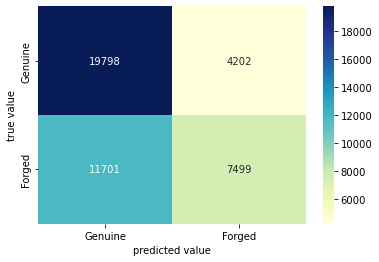

In [21]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value')

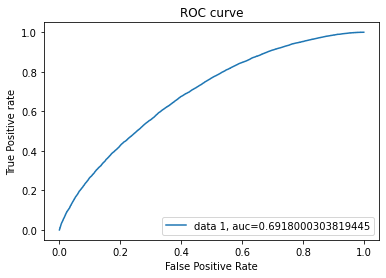

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict(validation_generator)[:,0]
fpr, tpr, _ = roc_curve(df.y,  y_pred_proba)
auc = roc_auc_score(df.y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [23]:
from sklearn.metrics import recall_score
tpr = recall_score(df.y,df.y_pred)   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(df.y,df.y_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

In [24]:
print(fpr)

0.17508333333333337


In [25]:
print(fnr)

0.6094270833333333


In [26]:
import pandas as pd
train_generator.reset
ytesthat = model.predict(train_generator)
print(ytesthat)
df = pd.DataFrame({
    'filename':train_generator.filenames,
    'predict':ytesthat[:,0],
    'y_train':train_generator.classes
})

[[2.5090945e-05]
 [3.6329409e-01]
 [1.4217882e-03]
 ...
 [9.9993038e-01]
 [1.0000000e+00]
 [9.9999702e-01]]


In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_train_pred'] = df['predict']>0.5
df.y_train_pred = df.y_train_pred.astype(int)
df

,filename,predict,y_train,y_train_pred
0,forged/cf-1637-01.jpg,0.00003,0,0
1,forged/cf-1637-02.jpg,0.36329,0,0
2,forged/cf-1637-03.jpg,0.00142,0,0
3,forged/cf-1637-04.jpg,0.00000,0,0
4,forged/cf-1637-05.jpg,0.00111,0,0
...,...,...,...,...
172795,genuine/c-999-20.jpg,0.99998,1,1
172796,genuine/c-999-21.jpg,0.99999,1,1
172797,genuine/c-999-22.jpg,0.99993,1,1
172798,genuine/c-999-23.jpg,1.00000,1,1


In [28]:
misclassified = df[df['y_train']!=df['y_train_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y_train'].count())

Total misclassified  Validation images : 8447


Text(33.0, 0.5, 'true value')

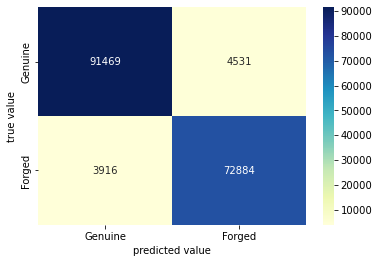

In [30]:
#Prediction of Training set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y_train,df.y_train_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value')

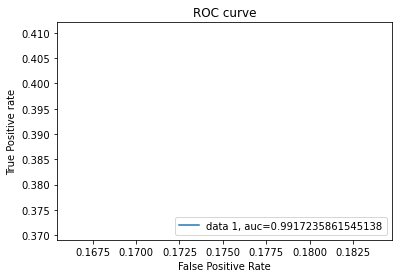

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_train_pred_proba = model.predict(train_generator)[:,0]
fpr_train, tpr_train, _ = roc_curve(df.y_train,  y_train_pred_proba)
auc = roc_auc_score(df.y_train,  y_train_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [32]:
plt.savefig("training_ROC_curve.png")

<Figure size 432x288 with 0 Axes>

In [33]:
from sklearn.metrics import recall_score
tpr = recall_score(df.y_train,df.y_train_pred)   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(df.y_train,df.y_train_pred, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

In [34]:
print("Flase positive Rate    "+  str(fpr))
print("Flase Negative Rate      "+  str(fnr))

Flase positive Rate    0.04719791666666662
Flase Negative Rate      0.050989583333333366


In [35]:
# Extracting Features from classification Layer
from tensorflow.keras.models import Model
layer_name= 'classification_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
print("Imtermediate model is constructed")


Imtermediate model is constructed


In [36]:
# Compilation of intermediate model
intermediate_layer_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
print("Model is Complied")

Model is Complied


In [37]:
# Saving intermediate model
intermediate_layer_model.save('/home/poornima/Data/GDPS/VGG16/intermediate_model_vgg16_GDPS_SGD.h5')
intermediate_layer_model.summary()

print("Saved Intermediate model to disk")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               128128

In [38]:
# Loading Intermediate Model
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/VGG16/intermediate_model_vgg16_GDPS_SGD.h5')
print("Intermediate model is loaded")

Intermediate model is loaded


In [39]:
# Training Label feature identification(y_train)

batch_size=16
sample_count=172800
features = np.zeros(shape=(172800, 64))  # Must be equal to the output of the convolutional base
labels = np.zeros(shape=(172800))
i = 0
for inputs_batch, labels_batch in train_generator:
   features_batch = model.predict(inputs_batch)
   features[i * batch_size: (i + 1) * batch_size] = features_batch
   labels[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels.shape)

(172800,)


In [41]:
#identification of training Labels
features_train=features
print(features_train.shape)
labels_train=np.expand_dims(labels, axis=1)
print(labels_train.shape)
print(labels_train)
print(features_train)

(172800, 64)
(172800, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
[[0.         0.         0.         ... 0.80725676 0.         0.60196596]
 [0.         0.16053879 0.         ... 0.71673781 0.         0.        ]
 [0.         0.         0.         ... 0.81970817 0.         0.        ]
 ...
 [0.19696932 0.         0.         ... 0.         1.67295671 0.        ]
 [0.         0.         1.05256414 ... 0.         2.28319025 0.        ]
 [0.50633466 0.         0.         ... 0.         0.97119415 0.35358551]]


In [42]:
# identification of test labels
import numpy as np
batch_size=16
sample_count=43200
features_test = np.zeros(shape=(43200, 64))  # Must be equal to the output of the convolutional base
labels_test = np.zeros(shape=(43200))
i = 0
for inputs_batch, labels_batch in validation_generator:
   features_batch = model.predict(inputs_batch)
   features_test[i * batch_size: (i + 1) * batch_size] = features_batch
   labels_test[i * batch_size: (i + 1) * batch_size] = labels_batch
   i += 1
   if i*batch_size  >= sample_count:
     break
print(labels_test.shape)
print(features_test.shape)
print(labels_test)

(43200,)
(43200, 64)
[0. 0. 0. ... 1. 1. 1.]


In [34]:
# #identification of testing Labels
print(features_test.shape)
labels_test=np.expand_dims(labels_test, axis=1)
print(labels_test.shape)
print(features_test)

(43200, 64)
(43200, 1)
[[0.22274882 0.         0.         ... 0.         0.         0.        ]
 [0.03555851 0.         0.         ... 0.         0.05140381 0.        ]
 [0.04821665 0.         0.         ... 0.         0.01655199 0.        ]
 ...
 [0.42892337 0.         0.         ... 0.         0.         0.        ]
 [0.33951366 0.         0.         ... 0.         0.         0.        ]
 [0.44695824 0.         0.         ... 0.         0.         0.        ]]


In [47]:
# SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[19897  4103]
 [12020  7180]]
Accuracy: 62.678
Precision: 63.636
Recall: 37.396
F-Measure: 47.108


In [49]:
# Kernel SVM
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[19916  4084]
 [11998  7202]]
Accuracy: 62.773
Precision: 63.814
Recall: 37.510
F-Measure: 47.248


In [48]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[20230  3770]
 [12381  6819]]
Accuracy: 62.613
Precision: 64.397
Recall: 35.516
F-Measure: 45.782


In [50]:
# Random Forest
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[20230  3770]
 [12381  6819]]
Accuracy: 62.613
Precision: 64.397
Recall: 35.516
F-Measure: 45.782


In [45]:
# Naive Bayes
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[19419  4581]
 [11327  7873]]
Accuracy: 63.176
Precision: 63.217
Recall: 41.005
F-Measure: 49.744


In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

# Fitting KernelSVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[19632  4368]
 [11708  7492]]
Accuracy: 62.787
Precision: 63.170
Recall: 39.021
F-Measure: 48.242


In [46]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(features_train)
X_test = sc.transform(features_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, labels_train.ravel())

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, y_pred)
print('Confusion matrix: ')
print(cm)
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(labels_test, y_pred)*100))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(labels_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(labels_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(labels_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

Confusion matrix: 
[[19964  4036]
 [12067  7133]]
Accuracy: 62.725
Precision: 63.864
Recall: 37.151
F-Measure: 46.976


In [4]:
from tensorflow.keras.models import load_model

model = load_model('/home/poornima/Data/GDPS/VGG16/saved-VGG16-SGD-model-89-0.68.h5')
#Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
#results = model.evaluate(validation_generator)
#print('test loss, test acc:', results)
print("Model Is Loaded")

2022-02-23 18:14:09.246556: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-23 18:14:09.248634: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-23 18:14:09.334189: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-23 18:14:09.334237: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-23 18:14:09.352434: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-23 18:14:09.352583: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0


# Evaluate on test data
Model Is Loaded


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click to know category of Image",  )
output = widgets.Output()

model = load_model('/content/drive/My Drive/Colab Notebooks/Signature Verification vgg16 model GDPS/model_vgg16_GDPS.h5')
img_path = '/content/drive/My Drive/Colab Notebooks/Dataset GDPS/train_dir/forged/cf-001-01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print(block4_pool_features)
if(block4_pool_features> 0.5):
  a= 'Genuine'
elif(block4_pool_features< 0.5):
  a='forged'
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    print("Image is  "  + a)

button.on_click(on_button_clicked)
display(button, output)

In [18]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified  Validation images : %d'%misclassified['y'].count())

Total misclassified  Validation images : 14014


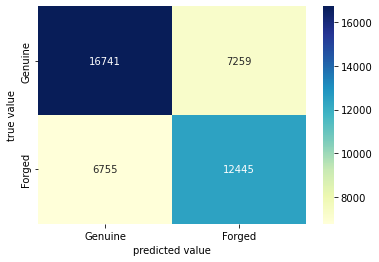

In [22]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Genuine', 'Forged'], yticklabels=['Genuine', 'Forged'] );
plt.xlabel('predicted value')
plt.ylabel('true value');

/home/poornima/anaconda3/envs/keras/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


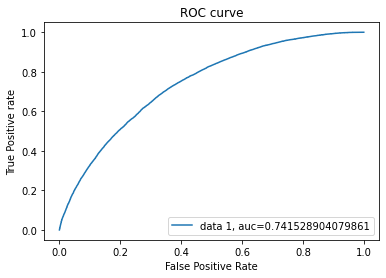

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(validation_generator)[:,0]
fpr, tpr, _ = roc_curve(df.y,  y_pred_proba)
auc = roc_auc_score(df.y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
plt.show()

In [21]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2022-02-23 18:28:28.516655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-02-23 18:28:28.516746: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-23 18:28:28.516808: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-23 18:28:28.516834: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-02-23 18:28:28.516859: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-02-23 18:28:28.516884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so